<a href="https://colab.research.google.com/github/Rahul-Malayil/CodSoft/blob/main/messagespam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                      SPAM SMS DETECTION

 Build an AI model that can classify SMS messages as spam or
 legitimate. Use techniques like TF-IDF or word embeddings with
 classifiers like Naive Bayes, Logistic Regression, or Support Vector
 Machines to identify spam messages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/spam.csv', header=None, encoding='latin-1')


data

,0,1,2,3,4
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
...,...,...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5569,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5570,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5571,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data.head(5)

,0,1,2,3,4
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [ ]:
data.tail(5)

,0,1,2,3,4
5568,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5569,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5570,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5571,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5572,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5573 non-null   object
 1   1       5573 non-null   object
 2   2       50 non-null     object
 3   3       12 non-null     object
 4   4       6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.columns

Index([0, 1, 2, 3, 4], dtype='int64')

In [ ]:
data.describe()

,0,1,2,3,4
count,5573,5573,50,12,6
unique,3,5170,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
data.isnull().sum()

,0
0,0
1,0
2,5523
3,5561
4,5567


We need to drop the columns  Unnamed2, Unnamed3 & Unnamed4

In [ ]:
data = data.drop(data.columns[[2, 3,4]], axis=1)
data

,0,1
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ì_ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


Rename the columns


In [ ]:
data.columns = ['Category', 'Message']
data

,Category,Message
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ì_ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.columns

Index(['Category', 'Message'], dtype='object')

Reset the column index


In [ ]:
count=data.columns.value_counts().reset_index()
count

,index,count
0,Category,1
1,Message,1


In [ ]:
data

,Category,Message
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ì_ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


Plot a Barplot of Spam message and Ham message

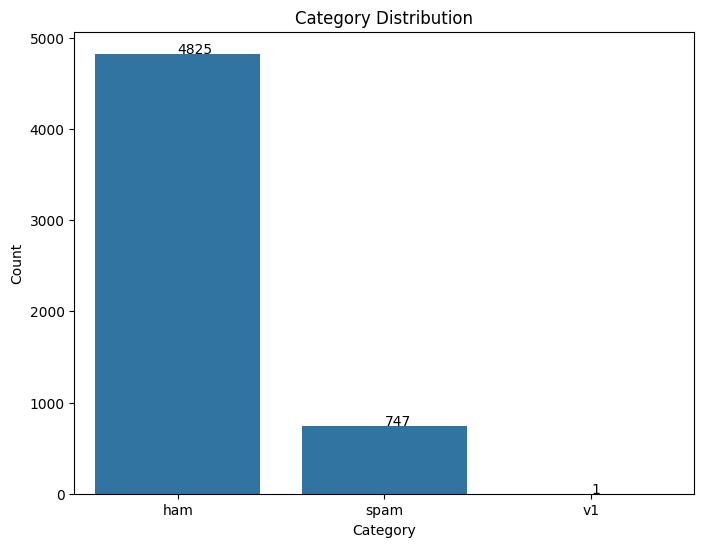

In [ ]:
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count))
plt.show()

In [ ]:
data

,Category,Message
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ì_ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


Drop the row v1

In [ ]:
data.drop(index=data.index[data['Category'] == 'v1'])

,Category,Message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ì_ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


Add a new column called 'Spam' to identify ham or spam message


In [ ]:
data['spam']= data['Category'].apply(lambda x: 1 if x=='spam' else 0)
data

,Category,Message,spam
0,v1,v2,0
1,ham,"Go until jurong point, crazy.. Available only ...",0
2,ham,Ok lar... Joking wif u oni...,0
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
4,ham,U dun say so early hor... U c already then say...,0
...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,1
5569,ham,Will Ì_ b going to esplanade fr home?,0
5570,ham,"Pity, * was in mood for that. So...any other s...",0
5571,ham,The guy did some bitching but I acted like i'd...,0


Perform Naive bayes machine learning technique to predict the spam message


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB


In [ ]:
x=np.array(data['Message'])
y=np.array(data['spam'])
cv=CountVectorizer()
x=cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)
model = MultinomialNB()
model.fit(xtrain, ytrain)

MultinomialNB()

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
samplemodel=input('Enter a message')
data = cv.transform([samplemodel]).toarray()
print(model.predict(data))

Enter a messageThis is the 2nd time we have tried 2 contact u...
[1]


In [ ]:
samplemodel=input('Enter a message')
data = cv.transform([samplemodel]).toarray()
print(model.predict(data))

Enter a messageOk lar... Joking wif u oni... 	
[0]


In [ ]:
model.score(xtrain, ytrain)

0.993838735601393

In [ ]:
model.score(xtest, ytest)

0.9826086956521739

In [ ]:
from sklearn.linear_model import LogisticRegression